<a href="https://colab.research.google.com/github/KUNALKEDARI20/Decision-Tree-Algorithm/blob/main/Assignment_no_11_Fraud_cheque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**-->>Use decision trees to prepare a model on fraud data
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report


In [2]:
df=pd.read_csv('/content/Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.info() # 0 null enteries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
# Preprocessing

le=preprocessing.LabelEncoder()
df['Undergrad']=le.fit_transform(df['Undergrad'])

In [5]:
df['Marital.Status']=le.fit_transform(df['Marital.Status'])

In [6]:
df['Urban']=le.fit_transform(df['Urban'])

In [7]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [8]:
df[df['Taxable.Income']<=30000].shape[0] # They are total 124 data enteries who have taxable income less than 30000

124

In [9]:
df[df['Taxable.Income']>=30000].shape[0] # They are total 476 data enteries who have taxable income greater than 30000

476

In [10]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good

df["TaxInc"] = pd.cut(df["Taxable.Income"],
                      bins = [10002,30000,99620],
                      labels = ["Risky", "Good"])

In [11]:
df['TaxInc']=le.fit_transform(df['TaxInc'])

In [12]:
df.head(30)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
5,0,0,33329,116382,0,0,0
6,0,0,83357,80890,8,1,0
7,1,2,62774,131253,3,1,0
8,0,2,83519,102481,12,1,0
9,1,0,98152,155482,4,1,0


**Split the data into X and Y

In [13]:
X=df.drop(['TaxInc'],axis=1)
Y = df.TaxInc

In [14]:
X

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [15]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: TaxInc, Length: 600, dtype: int64

**Converting Dataset into Train and Test Datasets**

In [28]:
# Spliting then data into 80-20% ratio
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [17]:
x_train.shape

(480, 6)

In [18]:
x_test.shape

(120, 6)

In [19]:
y_train.shape

(480,)

In [20]:
y_test.shape

(120,)

**Decision Tree Building**

In [29]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.5, 0.75, 'x[2] <= 30055.5\nentropy = 0.726\nsamples = 480\nvalue = [383, 97]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 97\nvalue = [0, 97]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 383\nvalue = [383, 0]')]

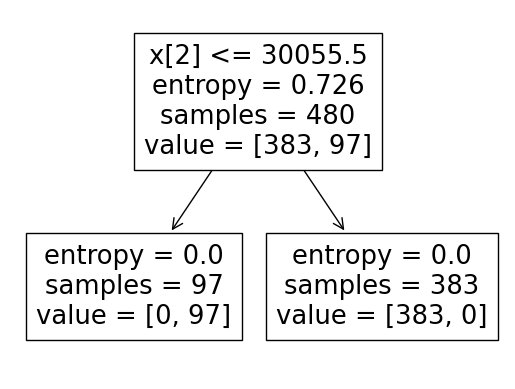

In [30]:
tree.plot_tree(model)

In [33]:
list(df)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'TaxInc']

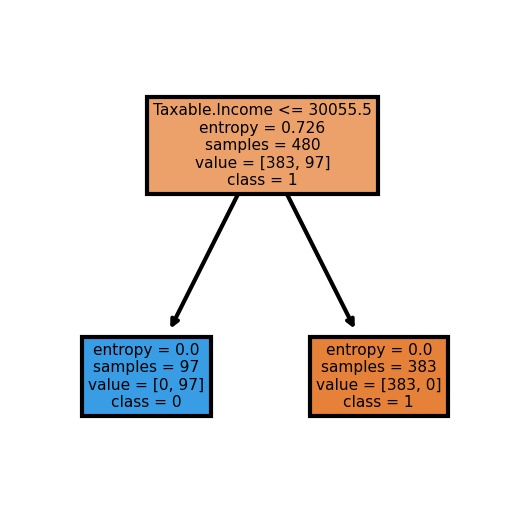

In [39]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['1','0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);


In [40]:
# Predicting on test data
prediction=model.predict(x_test)
pd.Series(prediction).value_counts()

0    93
1    27
dtype: int64

In [41]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [43]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,prediction)

col_0,0,1
TaxInc,,
0,93,0
1,0,27


In [44]:
#Accuracy of model

np.mean(prediction==y_test)

1.0

**Building Decision Tree Classifier (CART) using Gini Criteria**

In [45]:
from sklearn.tree import DecisionTreeClassifier

model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.75, 'x[2] <= 30055.5\ngini = 0.322\nsamples = 480\nvalue = [383, 97]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 97\nvalue = [0, 97]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 383\nvalue = [383, 0]')]

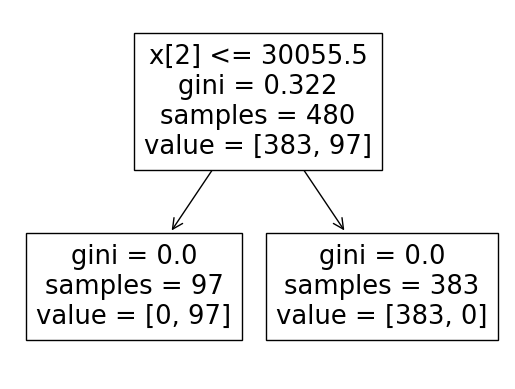

In [46]:
tree.plot_tree(model_gini)

In [47]:
# Prediction
gini_pred=model_gini.predict(x_test)
pd.Series(gini_pred).value_counts()

0    93
1    27
dtype: int64

In [48]:
#Accuracy
np.mean(gini_pred==y_test)

1.0

**Decision Tree Regression Example**

In [54]:
from sklearn.tree import DecisionTreeRegressor


In [49]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [55]:
regressor_model=DecisionTreeRegressor()
regressor_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [57]:
#Find the accuracy
regressor_model.score(X_test,y_test)

-1.2049331445364846